In [13]:
import pyro
import pyro.distributions as dist
import torch
import numpy as np
import matplotlib.pyplot as plt
import pyro.infer.mcmc as mcmc

def bayesian_pca(data, latent_dim):
    # Define model parameters
    n, p = data.shape
    sigma = pyro.sample("sigma", dist.Uniform(0., 10.))
    mu = torch.zeros(p)
    W = pyro.sample("W", dist.MultivariateNormal(mu, scale_tril=torch.eye(p)).expand([latent_dim]))
    Z = pyro.sample("Z", dist.Normal(torch.zeros(n, latent_dim), torch.ones(n, latent_dim)))
    X = pyro.sample("X", dist.Normal(Z @ W, sigma), obs=data)
    return X

In [14]:
# Define model
latent_dim = 2
model = bayesian_pca

# Generate fake data

#Does P have to match the latent dimension ? 
n, p = 100, 5
data = torch.randn(n, p)

# Run MCMC
num_samples = 1000
warmup_steps = 100
kernel = mcmc.HMC(model)
mcmc_run = mcmc.MCMC(kernel, num_samples=num_samples, warmup_steps=warmup_steps)
mcmc_run.run(data, latent_dim)

Sample: 100%|██████████| 1100/1100 [02:10,  8.44it/s, step size=1.79e-01, acc. prob=0.905]


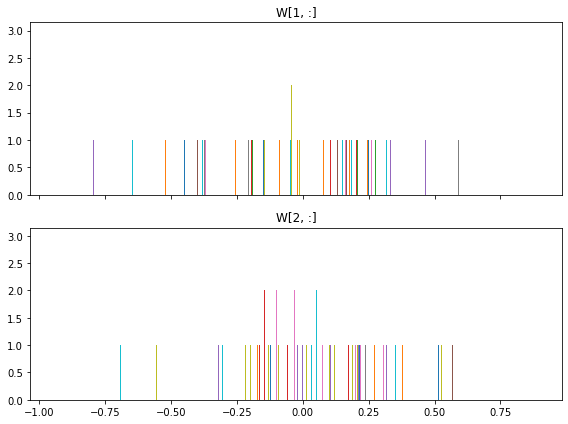

In [15]:
# Extract posterior samples
posterior_samples = mcmc_run.get_samples()

# Extract W, sigma, and Z samples
W_samples = posterior_samples["W"]
sigma_samples = posterior_samples["sigma"]
Z_samples = posterior_samples["Z"]

# Plot posterior samples of W
fig, axs = plt.subplots(latent_dim, 1, figsize=(8, 6), sharex=True)
for i in range(latent_dim):
    axs[i].hist(W_samples[:, i, :], bins=50)
    axs[i].set_title(f"W[{i+1}, :]")
plt.tight_layout()
plt.show()

In [20]:
#First is latent dimension 1, second is latent dimension 2. 

W_samples.size()
Z_samples.size()

torch.Size([1000, 100, 2])

In [18]:
data.size()

torch.Size([100, 5])

In [26]:
W_mean = W_samples.mean(dim=0)
pca_data = torch.matmul(data - data.mean(dim=0), W_mean.T)

In [27]:
pca_data

tensor([[-0.0096, -0.0628],
        [ 0.0367, -0.1267],
        [-0.0146,  0.0970],
        [-0.0244,  0.1957],
        [-0.0281, -0.0472],
        [ 0.0339, -0.0015],
        [ 0.0245, -0.0178],
        [-0.0362, -0.0089],
        [ 0.0499, -0.0385],
        [-0.0339, -0.0904],
        [ 0.0585, -0.1067],
        [-0.0428, -0.0689],
        [ 0.0871,  0.1126],
        [-0.0022, -0.0073],
        [ 0.1118, -0.1144],
        [-0.0453,  0.0026],
        [ 0.0291, -0.0375],
        [-0.0032, -0.0216],
        [ 0.0105,  0.0940],
        [ 0.0400, -0.0088],
        [ 0.0291, -0.0499],
        [-0.0763,  0.0642],
        [ 0.0107,  0.1405],
        [-0.0402, -0.0580],
        [ 0.0310,  0.1084],
        [ 0.0080, -0.1194],
        [ 0.0011,  0.0991],
        [-0.0316, -0.0438],
        [-0.0128,  0.0775],
        [ 0.0257, -0.0630],
        [-0.0146,  0.0170],
        [ 0.0478,  0.0067],
        [ 0.0326,  0.0159],
        [ 0.0059,  0.1016],
        [ 0.0329, -0.0193],
        [-0.0031, -0